# This is a the Test Simulation for MWM WD Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## New in Gamma-0
- No changes between beta-0 and gamma-0

In [2]:
ver = 'beta-0'
wd_tab = Table.read('workspace/target_files/WD/{}/mwm_wd_3x1.csv'.format(ver))
wd_tab

ra,dec
float64,float64
6.144819302092712,4.220270983113945
7.170039231661723,9.78786459205908
11.617624981140532,1.405028774571169
12.244686497198636,34.947622989900275
12.946896422373772,30.134428644547707
13.137610967042185,20.397248581179134
15.910982081378743,-5.38041416084691
23.216321553692467,20.888555899848875
30.34606959653738,19.925516137395103


/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)
/usr/local/lib/student/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


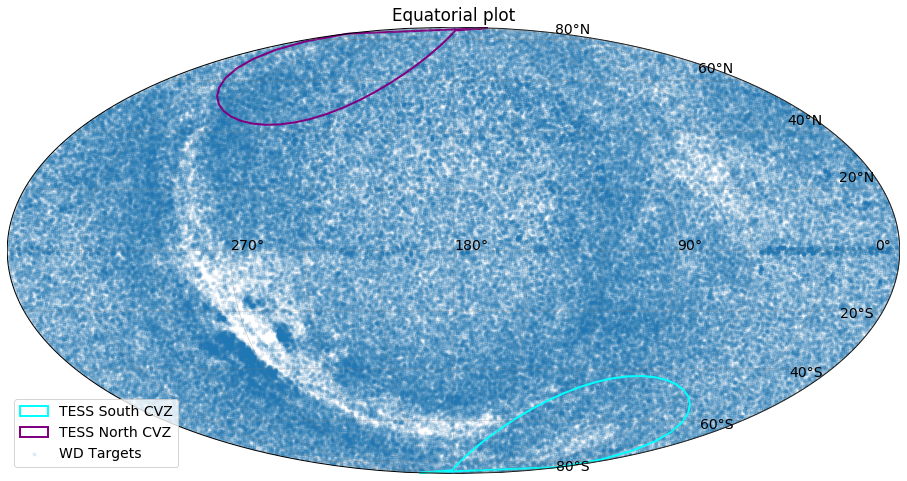

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
xwd,ywd = bmap(wd_tab['ra'],wd_tab['dec'])
bmap.scatter(xwd,ywd,marker='.',label='WD Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

In [5]:
target_tab['ra'] = wd_tab['ra']
target_tab['dec'] = wd_tab['dec']
target_tab['cadence'] = np.repeat('mwm_wd_2x1',len(wd_tab['ra']))
target_tab['type'] = np.repeat('mwm_wd',len(wd_tab['ra']))
target_tab['priority'] = np.repeat(np.array(15,dtype='int32'),len(wd_tab['ra']))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(wd_tab['ra']))

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str10,str6,int32,float32
6.144819302092712,4.220270983113945,mwm_wd_2x1,mwm_wd,15,1.0
7.170039231661723,9.78786459205908,mwm_wd_2x1,mwm_wd,15,1.0
11.617624981140532,1.405028774571169,mwm_wd_2x1,mwm_wd,15,1.0
12.244686497198636,34.947622989900275,mwm_wd_2x1,mwm_wd,15,1.0
12.946896422373772,30.134428644547707,mwm_wd_2x1,mwm_wd,15,1.0
13.137610967042185,20.397248581179134,mwm_wd_2x1,mwm_wd,15,1.0
15.910982081378743,-5.38041416084691,mwm_wd_2x1,mwm_wd,15,1.0
23.216321553692467,20.888555899848875,mwm_wd_2x1,mwm_wd,15,1.0
30.34606959653738,19.925516137395103,mwm_wd_2x1,mwm_wd,15,1.0


In [7]:
target_tab.write('{}/mwm_wd_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
For this cadence the last delta is basically 1 day up to the end of the survey.

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = ['mwm_wd_2x1']
cadence_tab['nepochs'] = np.array([2],dtype='int32')
cadence_tab['delta'] = [np.array([0,180],dtype='float32')]
cadence_tab['delta_min'] = [np.array([0,1],dtype='float32')]
cadence_tab['delta_max'] = [np.array([0,3000],dtype='float32')]
cadence_tab['lunation'] = [np.repeat(np.array([0.35],dtype='float32'),2)]
cadence_tab['instrument'] = [np.repeat('boss',2)]

In [10]:
cadence_tab

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
str10,int32,float32,float32,float32,float32,str4
mwm_wd_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss


In [11]:
cadence_tab['delta'].data

array([[  0., 180.]], dtype=float32)

In [12]:
cadence_tab.write('{}/mwm_wd_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [13]:
test =  Table.read('{}/mwm_wd_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [2],delta_min [2],delta_max [2],lunation [2],instrument [2]
bytes10,int32,float32,float32,float32,float32,bytes16
mwm_wd_2x1,2,0.0 .. 180.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss
